<a href="https://colab.research.google.com/github/Solsmi/challenge_telecomx_latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diccionario**
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: edad de cliente igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

#📌 Extracción

In [1]:
import requests
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##Inspeccionar Tipos de Datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

##Inspeccionar Valores Nulos

In [5]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


## Analizar Valores Únicos en Columnas Tipo *Object*

---



Para las columnas de tipo 'object', examinar los valores únicos para comprender las categorías existentes e identificar posibles inconsistencias o valores inesperados.


In [6]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    print(f"Column: {col}")
    value_counts = df[col].value_counts()
    print(value_counts)

    # destacar valores vacios o espacios en blanco
    empty_values_count = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
    if empty_values_count > 0:
        print(f"\033[1m    (Observacion: Se encontraron {empty_values_count} valores vacíos o de solo espacios en blanco)\033[0m") # ANSI escape codes for bold text

    print("\n" + "-" * 30 + "\n")

Column: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

------------------------------

Column: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
    (Observacion: Se encontraron 224 valores vacíos o de solo espacios en blanco)

------------------------------

Column: customer.gender
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

------------------------------

Column: customer.Partner
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

------------------------------

Column: customer.Dependents
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

------------------------------

Column: phone.PhoneService
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

------------------------------

Column: ph

El análisis de los valores únicos para las columnas de tipo 'object' ha revelado algunas inconsistencias:

- **Churn**: Además de 'No' y 'Yes', se encontraron 224 entradas con un valor vacío `''`. Esto podría indicar datos faltantes o un problema en la recolección de datos que necesita ser abordado.
- **account.Charges.Total**: Se identificaron 11 entradas con un valor vacío `''`. Dado que esta columna debería ser numérica (total de cargos), estos valores vacíos impedirán el análisis numérico y deben ser tratados. También, la columna `account.Charges.Total` se identificó como tipo `object` en el `df.info()`, lo que sugiere que los valores vacíos podrían estar causando que no se convierta a un tipo numérico adecuado. Esto requerirá una limpieza y conversión de tipo de datos.

##Valores vacíos o en blanco

In [7]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#🔧 Transformación

##Eliminar valores vacíos de Churn

In [8]:
df = df[df['Churn'] != '']
df.reset_index(drop=True, inplace=True)


In [9]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print(f"\nSuma Total: {churn_counts.sum()}")

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Suma Total: 7043


##Eliminar cadenas vacías y espacios en blanco de Charges.Total

In [10]:
df = df[df['account.Charges.Total'] != '']
df = df[df['account.Charges.Total'].str.strip() != '']
df.reset_index(drop=True, inplace=True)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   objec

##Estandarización español

In [12]:
columnas = {    # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'id_cliente',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total',

}
df = df.rename(columns= columnas)
df

,id_cliente,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [13]:
df['Churn'] = df['Churn'].replace({'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'Fiber optic': 'Fibra óptica'})
df['seguridad_online'] = df['seguridad_online'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['backup_online'] = df['backup_online'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['proteccion_dispositivo'] = df['proteccion_dispositivo'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['soporte_tecnico'] = df['soporte_tecnico'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['streaming_tv'] = df['streaming_tv'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['streaming_peliculas'] = df['streaming_peliculas'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df['factura_digital'] = df['factura_digital'].replace({'Yes': 'Sí'})
df['metodo_pago'] = df['metodo_pago'].replace({'Mailed check': 'Cheque por correo', 'Electronic check': 'Cheque electrónico', 'Bank transfer (automatic)': 'Transferencia bancaria (automática)', 'Credit card (automatic)': 'Tarjeta de crédito (automática)'})

In [14]:
pd.set_option('display.max_columns', None)  #ver todas las columnas

In [15]:
df.head()

,id_cliente,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Anual,Sí,Cheque por correo,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mensual,No,Cheque por correo,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,83.9,267.40


In [16]:
df['cuentas_diarias'] = df['cargo_mensual'] / 30
df.head()

,id_cliente,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Anual,Sí,Cheque por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mensual,No,Cheque por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,83.9,267.40,2.796667


EDADES

In [17]:
print(df['tiene +60'].unique())

[0 1]


In [18]:
df['tiene +60'].value_counts()  #mayoría de clientes tienen <60 años

,count
tiene +60,
0,5890
1,1142


#📊 Carga y análisis

##Análisis descriptivo

In [19]:
df.describe()

,tiene +60,tiempo_contrato,cargo_mensual,cargo_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


##Distribución de evasión

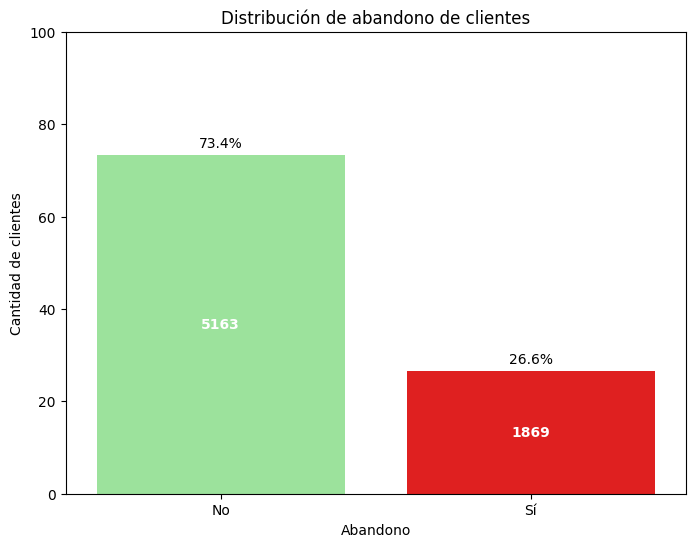

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_percentages = df['Churn'].value_counts(normalize=True) * 100
churn_counts_abs = df['Churn'].value_counts()

color_map = {'No': 'lightgreen', 'Sí': 'red'}

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_percentages.index, y=churn_percentages.values, hue=churn_percentages.index, palette=color_map, legend=False)
plt.title('Distribución de abandono de clientes')
plt.xlabel('Abandono')
plt.ylabel('Cantidad de clientes')
plt.ylim(0, 100)

for index, percentage_value in enumerate(churn_percentages.values):
    # Porcentaje
    plt.text(index, percentage_value + 1, f'{percentage_value:.1f}%', ha='center', va='bottom')
    # Valor absoluto de churn
    abs_value = churn_counts_abs.iloc[index]
    plt.text(index, percentage_value / 2, f'{abs_value}', ha='center', va='center', color='white', fontweight='bold')

plt.show()

#📄Informe final